# Module 1: Can Food Models have Bias? 
### _A rigorous evaluation of the impact of data on model performance_

Model performance can vary significantly with different groups or types of data, especially if a model has high bias. Models have bias in part because training data has bias, and training data has bias because people curate training data. A prerequisite to evaluating model bias is understanding how your model performs on different types of data. To achieve a comprehensive understanding of model performance, you can use established evaluation metrics. In this module, you will learn what those metrics are, how they work, and how to interpret them. 


<img src="images/model_bias.png" alt="drawing" width="450" height="450"/>

This module will take place over the course of 3 in-class periods and an assignment. The schedule for the module is as follows: 

## Module Schedule

### Day 1: Intro to the Blackbox

#### _Agenda:_

* Discussion: impacts of machine learning (15 min)
* Lecture: The life cycle of an ML model (15 min)
* In-class activity: Playing with input data (40 min)
* Reflection (15 min)
* Brief course overview and assignment intro (10 min)
* Fill out course entrance survey and ask remaining questions (5 min)

#### _Homework:_ 

* Read [this](https://www.datacamp.com/blog/machine-learning-lifecycle-explained) article on the ML model development cycle

### Day 2: Model Evaluation

#### _Agenda:_

* Discussion: Debriefing the homework reading (10 min)
* Lecture: Evaluation Metrics (20 min)
* In-class activity: Interpreting metrics practice (40 min)
* Reflection (5 min)
* Work time: Assignment 1 (25 min)

#### _Homework:_ 

* Finish through section x of assignment 1 (in this notebook!)
* Read these two articles ([one](https://spotintelligence.com/2023/04/07/data-quality-machine-learning/) and [two](https://developers.google.com/machine-learning/data-prep/construct/collect/data-size-quality)) on evaluating dataset quality for machine learning models.

### Day 3: Dataset Evaluation

#### _Agenda:_

* Discussion: How might you use evaluation metrics to assess bias? (15 min)
* Lecture: 
    - Dataset splitting (10 min)
    - In dataset vs. out of dataset evaluation (10 min)
* In class activity: Playing with datasets and dataset splitting (40 min)
* Reflection (5 min)
* Work time: Assignment 1 (20 min)

### _Homework:_ 

* Finish assignment 1

# Assignment 1: 
Welcome to the first Assignment of Machine Learning! In this assignment, you are the head of the R&D department at Pie-thagoras Labs, a new FoodTech start-up that is aimed at helping members of the visually impaired and blind community in different food-related situations. The first product you are making is an image-based dessert classifier that enables users to obtained detailed information about foods in front of them by simply taking a picture (read [this paper](https://www.jsr.org/hs/index.php/path/article/view/2341) if you are interested in diving deeper into image-based food classifiers). As a part of developing this product, three of your employees have trained their own classification models (`model`, `model2`, and `model3`) on different components of the dessert dataset. It is now your responsibility to evaluate each of them. By the end of your analysis, you need to give a thorough assessment of each model, including which (if any) should be integrated into your company's consumer products.

## Section 1: Metrics Overview
Before being able to evaluate your employees' models, you need to implement metrics that help you quantitatively assess the results of each model. The metrics you will implement in this assignment are:

* Confusion Matrix 
* Classification Accuracy
* Precision 
* Recall

**_Consult_** **_[this article](https://arxiv.org/abs/2008.05756)_** **_to_** **_learn_** **_about_** **_the_** **_metrics_** **_and_** **_inform_** **_your_** **_implementation_**

### Confusion Matrix

According to [the article](https://arxiv.org/abs/2008.05756), a "confusion matrix is a cross table that records the number of occurrences between two raters, the true/actual classification and the predicted classification".

Before we dive deeper, we need to import the libraries we are going to use to create the confusion matrix:

In [2]:
# Matplotlib allows us to make plots
import matplotlib
# Matplotlib inline allows us to interact with plots, via zooming, etc.
%matplotlib inline

In [1]:
# Tensorflow is a machine learning framework
import tensorflow as tf
# Json helps us work with json file formats
import json
from collections import defaultdict

2023-12-16 17:48:16.540963: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-16 17:48:17.543552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 17:48:18.542593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Next, we are going to import our data from the json file that has the results of our models predictions. This specific data is a sample from the challenge in Section 2.

In [6]:
# Load the json file
with open("model_testing/results/model0.json", "r") as file:
    data = json.load(file)
    
# Retrieve class mappings
class_mappings = data["class_indices"]
# Retrieve predictions 
predictions = [x["prediction_idx"] for x in data["predictions_and_labels"]]
# Retrieve ground truth labels
gt_labels = [x["gt_idx"] for x in data["predictions_and_labels"]]

Because we haven't worked with models yet, we wanted to show you what the predictions and ground truth/actual labels look like. Each of these numbers maps to a particular dessert class, of which there are 23. The class indexing starts at 0.  

In [5]:
print(predictions)
print(gt_labels)

[5, 13, 20, 21, 21, 21, 11, 20, 20, 21, 21, 15, 7, 3, 21, 21, 21, 21, 1, 5, 5, 9, 17, 21, 19, 7, 21, 14, 7, 0, 21, 8, 21, 5, 17, 20, 19, 21, 21, 21, 8, 21, 21, 4, 19, 21, 1, 11, 19, 21, 6, 19, 19, 21, 3, 21, 0, 5, 21, 21, 7, 20, 21, 21, 7, 21, 7, 6, 21, 5, 21, 19, 7, 12, 21, 20, 21, 21, 21, 12, 21, 18, 21, 21, 21, 21, 21, 21, 5, 21, 21, 7, 21, 21, 10, 21, 2, 7, 21, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 3, 9, 9, 13, 9, 7, 9, 9, 9, 9, 9, 14, 9, 9, 21, 9, 9, 9, 9, 4, 9, 9, 9, 20, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 22, 5, 9, 9, 9, 9, 22, 9, 9, 9, 9, 9, 9, 9, 9, 9, 19, 9, 9, 21, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17, 17, 2, 13, 17, 17, 17, 17, 17, 17, 17, 18, 17, 22, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 22, 17, 17, 17, 17, 17, 17, 17, 2, 5, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,

Next, we are going to implement a multi-class confusion matrix. 

**Side note:** There is a variation of the confusion matrix which just handles a binary classification: you're either part of the class or not. That is a binary confusion matrix. 

In a lot of cases, there are more than two classes to sort pictures into. The multi-class confusion matrix helps us calculate various metrics that illustrate how well our model performs with input data from multiple classes, not just one. 

First we are going to introduce how binary classification works.

A binary confusion matrix looks like this: 

<img src="images/binary_class.png" alt="drawing" width="450" height="450"/>

Where the prediction is either part of the class or not. It's pretty straightforward. 

A **positive** prediction indicates that the model thinks the image is a member of the class.

A **negative** prediction indicates that the model thinks the image is not part of the class. 

The confusion matrix then charts pairs the predictions with their ground truth labels, or the actual classes the images belong to/the labels they actually have. Using this information, we can see how accurate the model is. 

Here are the metrics a binary confusion matrix can tell you:


#### False Positive (FP):
In this instance, a false positive means that a picture that is not part of the class is labeled as a member of the class. An example would be cat labeled as dog if the classifier only answered the question, "Is this a dog or not?"

#### True Positive (TP):
A true positive is a member of the class and is classified as a member of the class. An example is, a picture of a dog is classified as a dog. 

#### True Negative (TN):
This is not a member of the class, and the prediction agrees with that. An example of this is, the cat being labeled as not a dog. 

#### False Negative (FN):
A false negative is a image that is part of the class, but is labeled as being not part of the class. An example is a dog being classified as not a dog.


Now, in the multi-class case, the confusion matrix becomes slightly bigger:

<img src="images/multi-class.png" alt="drawing" width="600" height="450"/>

It illustrates, for each class, how many times a picture belonging to that class was labeled a certain way. For example, this graphic illustrates how often greyhound was classified as greyhound, how often greyhound was classified as mastiff, etc. 

Remember, for each image in our dataset, there is the **predicted** label and the **actual** label. 

Knowing this information about the dataset and about confusion matrices, see if you can implement a mutli-class confusion matrix for yourself! 



#### Exercise 1

In [25]:
## Really, this is all about creating boxes and incrementing the numbers that go into each box
def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    # Initialize the confusion matrix with zeros
    # The matrix is a 2D list where rows represent the true classes/labels and columns represent the predicted classes/labels
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Iterate over the pairs of predictions and ground truth labels
    for pred, true in zip(predictions, gt_labels):
        # Increment the appropriate cell in the confusion matrix
        # The cell at [true][pred] should be incremented since 'true' is the true class, and 'pred' is the predicted class
        # TODO: Write code here to update the confusion matrix
        pass

    # Return the populated confusion matrix
    return confusion_matrix

#### Answer

In [7]:
def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    # Initialize the confusion matrix with zeros
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Populate the confusion matrix
    for pred, true in zip(predictions, gt_labels):
        confusion_matrix[true][pred] += 1

    return confusion_matrix

Now, let's display our confusion matrix. 

In [8]:
class_indices = data["class_indices"]
num_classes = len(class_indices)

# Calculate the confusion matrix
cm = calculate_confusion_matrix(predictions, gt_labels, num_classes)

# Print the confusion matrix
print("Confusion Matrix:")
for row in cm:
    print(row)

Confusion Matrix:
[34, 6, 4, 15, 5, 3, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 4, 1, 2, 1, 9, 1, 9]
[12, 60, 3, 3, 2, 4, 1, 1, 1, 0, 0, 5, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3]
[1, 1, 83, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1]
[6, 2, 1, 63, 1, 5, 1, 4, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 5, 4, 2]
[2, 0, 3, 3, 69, 1, 1, 2, 0, 4, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 1, 5]
[5, 2, 1, 4, 1, 57, 2, 7, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 8, 5, 3, 3]
[0, 1, 0, 6, 3, 3, 41, 9, 4, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 3, 13, 7, 2]
[1, 0, 0, 3, 0, 10, 7, 52, 6, 1, 1, 0, 1, 4, 0, 0, 0, 1, 2, 4, 4, 2, 1]
[0, 1, 1, 8, 0, 6, 5, 19, 28, 4, 2, 0, 1, 1, 0, 4, 2, 1, 2, 1, 6, 6, 2]
[0, 0, 0, 1, 3, 1, 0, 1, 2, 83, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2]
[0, 1, 3, 5, 0, 0, 1, 1, 1, 2, 76, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 4, 1]
[2, 1, 1, 4, 1, 1, 1, 1, 0, 1, 1, 81, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3]
[2, 1, 0, 1, 0, 3, 1, 2, 1, 1, 0, 0, 62, 7, 0, 2, 0, 3, 0, 4, 4, 3, 3]
[2, 2, 8, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 70, 0, 0, 3, 4

Now that we have our confusion matrix, we can calculate the various metrics embedded within it. Because this is a multi-class classification, the metrics will be relative to each class. For example: a hot dog is misclassified as a churro. From the churro class perspective, this is a false positive. From the hotdog class perspective, this is a false negative. 

To redefine these metrics for the multi-class case very explicitly:

## TP, TN, FP, and FN, Again

<img src="images/hotdog.png" alt="drawing" width="450" height="450"/>

### True Positive (Multi-class case):
The number of true positives for a particular class is the number of correctly identified images of that class.

**Hint** (Only look if you want a hint):

In a multi-class confusion matrix, these are the diagonal elements of the matrix. Ie., photos that are predicted to be of class x given that the ground truth label is x. 

### True Negative (Multi-class case):
The number of true negatives for a particular class is the number of images that are not from the class and were identified as being not from the class.

**Hint** (Only look if you want a hint):

In a multi-class confusion matrix, it is the sum of all of the elements that are not in the class index's row and column. (Feel free to think through this on your own as well, by looking at the multi-class graphic)

### False Positive (Multi-class case):
The number of false positives for a particular class is the number of images that are not from the class but were identified as being from the class. For example, a non-churro was labeled as a churro. 

**Hint** (Only look if you want a hint):

In a multi-class confusion matrix, it is the sum of the values in the column for the class, without the true positive term at the [class_index, class_index] position in the diagonal. 

### False Negative (Multi-class case):
The number of false negatives for a particular class is the number of images that are from the class that are labeled as being not from the class. For example, a churro picture was misclassified as an apple. 

**Hint** (Only look if you want a hint):

In a multi-class confusion matrix, it is the sum of the values in the row for that class, excluding the diagonal true positive term.
 

**Let's** **implement** **a** **function** **that** **will** **calculate** **these** **metrics!**

#### Exercise 2

In [9]:
def calculate_confusion_matrix_details(confusion_matrix):
    # Get the number of classes from the confusion matrix's size
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)

    # Iterate over each class to calculate TP, FP, FN, and TN
    for i in range(num_classes):
        
        # TODO: Calculate True Positives (TP) for the current class
        TP = ...
        # TODO: Calculate False Positives (FP) for the current class
        FP = ...
        # TODO: Calculate False Negatives (FN) for the current class
        FN = ...
        # TODO: Calculate True Negatives (TN) for the current class
        TN = ...
        # Store the calculated values in the details dictionary
        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    # Return the dictionary containing detailed metrics for each class
    return details

#### Answer

In [10]:
def calculate_confusion_matrix_details(confusion_matrix):
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)

    for i in range(num_classes):
        TP = confusion_matrix[i][i]
        FP = sum(confusion_matrix[j][i] for j in range(num_classes)) - TP
        FN = sum(confusion_matrix[i][j] for j in range(num_classes)) - TP
        TN = sum(sum(confusion_matrix[j][k] for k in range(num_classes) if k != i) for j in range(num_classes) if j != i)

        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    return details

Now you can display the TP, TN, FP, FN information for each class.

In [11]:
cm_details = calculate_confusion_matrix_details(cm)
for class_index, values in cm_details.items():
    print(f"Class {class_index}: {values}")

Class 0: {'TP': 34, 'FP': 56, 'FN': 66, 'TN': 2144}
Class 1: {'TP': 60, 'FP': 24, 'FN': 40, 'TN': 2176}
Class 2: {'TP': 83, 'FP': 49, 'FN': 17, 'TN': 2151}
Class 3: {'TP': 63, 'FP': 103, 'FN': 37, 'TN': 2097}
Class 4: {'TP': 69, 'FP': 24, 'FN': 31, 'TN': 2176}
Class 5: {'TP': 57, 'FP': 76, 'FN': 43, 'TN': 2124}
Class 6: {'TP': 41, 'FP': 35, 'FN': 59, 'TN': 2165}
Class 7: {'TP': 52, 'FP': 72, 'FN': 48, 'TN': 2128}
Class 8: {'TP': 28, 'FP': 24, 'FN': 72, 'TN': 2176}
Class 9: {'TP': 83, 'FP': 40, 'FN': 17, 'TN': 2160}
Class 10: {'TP': 76, 'FP': 14, 'FN': 24, 'TN': 2186}
Class 11: {'TP': 81, 'FP': 15, 'FN': 19, 'TN': 2185}
Class 12: {'TP': 62, 'FP': 12, 'FN': 38, 'TN': 2188}
Class 13: {'TP': 70, 'FP': 28, 'FN': 30, 'TN': 2172}
Class 14: {'TP': 42, 'FP': 14, 'FN': 58, 'TN': 2186}
Class 15: {'TP': 64, 'FP': 14, 'FN': 36, 'TN': 2186}
Class 16: {'TP': 51, 'FP': 38, 'FN': 49, 'TN': 2162}
Class 17: {'TP': 89, 'FP': 20, 'FN': 11, 'TN': 2180}
Class 18: {'TP': 56, 'FP': 17, 'FN': 44, 'TN': 2183}
Cl

### Classification Accuracy
First, read [this article](https://www.sharpsightlabs.com/blog/classification-accuracy-explained/) about classification accuracy for a brief intro. 

In other words, "classification accuracy is the ratio of the number of correct predictions to the total number of input samples" (Yalug, et al.) ([Source](https://www.sciencedirect.com/science/article/abs/pii/B9780128228289000058))

Knowing this, and how a classification matrix is constructed, see if you can implement your own function to calculate classification accuracy!

#### Exercise 3

In [12]:
def calculate_accuracy(confusion_matrix):
    # TODO: Calculate the sum of TPs
    # Hint (don't look if you don't want it): TPs for a class are located at the diagonal elements of the confusion matrix
    correct_predictions = ...

    # TODO: Calculate the total number of predictions
    # Hint (don't look if you don't want it): The total number of predictions is the sum of all elements in the confusion matrix
    total_predictions = ...

    # TODO: Calculate accuracy
    # Hint (don't look if you don't want it): Accuracy is the ratio of correct_predictions to total_predictions
    # Make sure to check if total_predictions is not zero to avoid division by zero
    accuracy = ...

    # Return the calculated accuracy
    return accuracy


#### Answer

In [13]:
def calculate_accuracy(confusion_matrix):
    # Calculate the sum of TPs
    correct_predictions = sum(confusion_matrix[i][i] for i in range(len(confusion_matrix)))

    # Calculate the total number of predictions
    total_predictions = sum(sum(row) for row in confusion_matrix)

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

Now we can display our accuracy!

In [14]:
# Example usage
accuracy = calculate_accuracy(cm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6034782608695652


### Precision

Precision is a metric that tells you how good your model is at predicting that something is a member of your class. In other words, it is the accuracy of the positive predictions. The way you calculate it is by finding the ratio of true positives in your class to all positive predictions (true and false positive predictions).

$$ \frac{\text{TP}}{\text{TP} + \text{FP}}$$

It's like asking the question, "How many of my positive predictions were actually correct?" ([source](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall))

See if you can implement a function that will calculate this!


#### Exercise 4

In [15]:
def calculate_precision(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    precision_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Positives (FP) for the current class from the details
        TP = ...
        FP = ...
        
        # TODO: Calculate precision for each class
        # Hint (don't look if you don't want it): Precision is the ratio of TP to the sum of TP and FP.
        # Make sure to check if the sum of TP and FP is not zero to avoid dividing by zero.
        precision = ...

        # Store the precision score for the class
        precision_scores[class_index] = precision

    # Return the dictionary containing precision scores for each class
    return precision_scores

#### Answer

In [16]:
def calculate_precision(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    precision_scores = defaultdict(float)

    for class_index, metrics in details.items():
        TP = metrics['TP']
        FP = metrics['FP']
        
        # Calculate precision for each class
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precision_scores[class_index] = precision

    return precision_scores


Now we can display our precision for each class!

In [17]:
# Example usage
precision_scores = calculate_precision(cm)
for class_index, precision in precision_scores.items():
    print(f"Precision for class {class_index}: {precision}")

Precision for class 0: 0.37777777777777777
Precision for class 1: 0.7142857142857143
Precision for class 2: 0.6287878787878788
Precision for class 3: 0.3795180722891566
Precision for class 4: 0.7419354838709677
Precision for class 5: 0.42857142857142855
Precision for class 6: 0.5394736842105263
Precision for class 7: 0.41935483870967744
Precision for class 8: 0.5384615384615384
Precision for class 9: 0.6747967479674797
Precision for class 10: 0.8444444444444444
Precision for class 11: 0.84375
Precision for class 12: 0.8378378378378378
Precision for class 13: 0.7142857142857143
Precision for class 14: 0.75
Precision for class 15: 0.8205128205128205
Precision for class 16: 0.5730337078651685
Precision for class 17: 0.8165137614678899
Precision for class 18: 0.7671232876712328
Precision for class 19: 0.5454545454545454
Precision for class 20: 0.42857142857142855
Precision for class 21: 0.4842105263157895
Precision for class 22: 0.5197368421052632


### Recall

Recall is a similar metric to precision, but rather than identifying the accuracy of positive predictions, we are looking at the accuracy of classifying members of the class. 

Meaning, we are answering the question: "What proportion of positive identifications were actually correct?" ([source](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)) For every picture in our dataset that is **actually** in our class, how many were correctly identified?


$$ \frac{\text{TP}}{\text{TP} + \text{FN}}$$

Because $FN =$ members of the class misidentified and $TP=$ members of the class correctly identified, so $FN + TP =$ all members of class in dataset

Let's see if you can implement a function that calculates recall!



#### Exercise 6

In [18]:
def calculate_recall(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    recall_scores = defaultdict(float)

    for class_index, metrics in details.items():
        # TODO: Retrieve True Positives (TP) and False Negatives (FN) for the current class from the details
        TP = ...
        FN = ...
        
        # TODO: Calculate recall for each class
        # Be sure to check if the sum of TP and FN is not zero to avoid dividing by zero
        recall = ...

        # Store the recall score for the class
        recall_scores[class_index] = recall

    # Return the dictionary containing recall scores for each class
    return recall_scores


#### Answer

In [19]:
def calculate_recall(confusion_matrix):
    details = calculate_confusion_matrix_details(confusion_matrix)
    recall_scores = defaultdict(float)

    for class_index, metrics in details.items():
        TP = metrics['TP']
        FN = metrics['FN']
        
        # Calculate recall for each class
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        recall_scores[class_index] = recall

    return recall_scores

Now we can display our recall for each class!

In [20]:
# Example usage
recall_scores = calculate_recall(cm)
for class_index, recall in recall_scores.items():
    print(f"Recall for class {class_index}: {recall}")

Recall for class 0: 0.34
Recall for class 1: 0.6
Recall for class 2: 0.83
Recall for class 3: 0.63
Recall for class 4: 0.69
Recall for class 5: 0.57
Recall for class 6: 0.41
Recall for class 7: 0.52
Recall for class 8: 0.28
Recall for class 9: 0.83
Recall for class 10: 0.76
Recall for class 11: 0.81
Recall for class 12: 0.62
Recall for class 13: 0.7
Recall for class 14: 0.42
Recall for class 15: 0.64
Recall for class 16: 0.51
Recall for class 17: 0.89
Recall for class 18: 0.56
Recall for class 19: 0.42
Recall for class 20: 0.6
Recall for class 21: 0.46
Recall for class 22: 0.79


## Section 2: Model Analysis
Now that you have helper functions to assist you with your model analysis, it is now time for you to draft a comprehensive report highlighting the strengths and weaknesses of each model, along with your opinion on if any model is production quality.

### Model Information
Each of the three models are structured as Residual Neural Networks (it's okay if this term doesn't make sense! This will be covered later in the course, but if you're interested, take a look at [this reading](https://www.geeksforgeeks.org/residual-networks-resnet-deep-learning/) for more information) that were trained on roughly 6300 images. However, each employee had access to varying amounts of data when training their models, which may impact their relative performances. We have also provided the full datasets that your employees used for training their respective models. These images can be downloaded and extracted from [this link](https://drive.google.com/file/d/1YVtKvjsCaqSBf03AtJTdOsJOOJNphw08/view?usp=sharing).

### Model Testing
Along with each model, we have included results from one iteration of testing of each model. For testing, we ran each model with a set of 2300 images (100 images for each of the 23 dessert classifications that the models were trained on), yielding predictions for each inputted image. The results of these experiments can be found in `model_testing/results/modelX.json`, which include the ground truth labels, predicted labels, and the dessert item associated with each label. If you believe that this level of testing is not sufficient, you are welcome to conduct your own validation steps. Some possible extensions include (but are not limited to):
- Mofidying the current testing datasets and validation pipeline. The numpy files representing the test dataset can be found in [this link](https://drive.google.com/file/d/1hg-LwdOx6FBZScWDZOV5PBle2NFuI50W/view?usp=sharing). (If you would like it to be split up due to RAM limitation, you can find [part one](https://drive.google.com/file/d/1twPg-JEx9VjNNKAn5ik6v8mMQEUHSCZ_/view?usp=sharing) and [part two](https://drive.google.com/file/d/1zb_389iEF_dHPEYt6qKz6P-8N_MasP1H/view?usp=sharing)). Some examples of possible modifications you can include are:
    - Rotating the image to evaluate the degree to which the algorithm is robust to orientational differences
    - Changing the brightness of each image to evaluate the dependence on lighting conditions.
    - Changing the resolution of each image to determine if a certain level of quality is necessary for the algorithms to be successful.
- Finding external datasets to use for assessment (Helper functions for pre-processing and passing external images to the models can be found in `model_testing/test.py`)

### Write-Up Requirements
Now, you are ready to begin your analysis of each model. In your write-up, be sure to include each of the following:
- Utilize the functions you created in Section 2 to explore different estimates of accuracy for each models (include analysis on how the metrics are relevant in the context of this problem)
- One extension (or modification) to the given testing pipeline (If you're looking for your own dataset, `www.kaggle.com` or `https://towardsdatascience.com/top-sources-for-machine-learning-datasets-bb6d0dc3378b` outline great starting points - also feel free to take pictures in the dining hall)
- For each model, evaluating the quality of the datasets used for training (qualitatively) using the frameworks described in the Day 2 Homework Readings. For additional information to supplement your analysis, we recommend reading [Microsoft's AI Fairness Checklist](https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE4t6dA).
- For each model you believe is fit for production, include an assessment of any outstanding risks associated with the model(s) and potential methods for mitigating those risks.
- For each model you believe is not fit for production, propose improvements that the respective employees could take to improve their model
- For every model, highlight the process and quantitative analysis that led to your assessment.

Be sure to attach any code/resources you used to create your write-up.

In [21]:
# These are the results from the first round of testing for each of the three models your employees submitted.
with open("model_testing/results/model0.json", "r") as file:
    model0_data = json.load(file)
with open("model_testing/results/model1.json", "r") as file:
    model1_data = json.load(file)
with open("model_testing/results/model2.json", "r") as file:
    model2_data = json.load(file)

We have also provided some helper code if you would like to run the models on external data. An example is shown below.

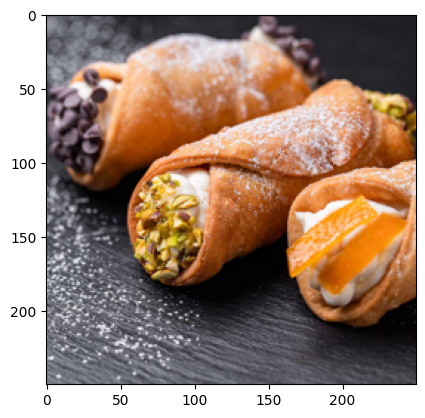

1/1 [==============================] - 0s 432ms/step
Predicted Label: cannoli


In [24]:
from model_testing.test import test_model_on_image
pred_idx, pred_label = test_model_on_image(model_name="model1", path_to_image="images/cannoli-recipe-snippet.jpg", visualize=True)
print(f"Predicted Label: {pred_label}")


In [ ]:
# Attach your code and analysis below!